# Tabla de compras

# 1. Importacion de librerias, lectura de archivo y primeras visualizaciones

In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lectura del archivo
Compras = pd.read_csv("InvoicePurchases12312016.csv",sep=',')

In [3]:
#Comprobamos la cantidad de registros 
np.shape (Compras)

(5543, 10)

In [4]:
#Visualizamos las primeras 5 filas
Compras.head ()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [5]:
#Corroboramos el tipo de dato de las columnas
print (Compras.dtypes)

VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object


In [6]:
#Verificamos la cantidad de datos faltantes por columna
print(Compras.isnull().sum())

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64


In [7]:
#Verificamos las filas con valores nulos
Compras_filas_nulas = Compras.isnull().any(axis=1)

#Mostramos las filas con valores nulos
Compras_filas_con_nulos = Compras [Compras_filas_nulas]

#Imprimimos las filas con valores nulos
if not Compras_filas_con_nulos.empty:
    print("Filas con valores nulos encontradas:")
    print(Compras_filas_con_nulos)
else:
    print("No se encontraron filas con valores nulos.")

Filas con valores nulos encontradas:
      VendorNumber                   VendorName InvoiceDate  PONumber  \
0              105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1             4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2              388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3              480  BACARDI USA INC              2016-01-12      8106   
4              516  BANFI PRODUCTS CORP          2016-01-07      8170   
...            ...                          ...         ...       ...   
5538          9622  WEIN BAUER INC               2017-01-06     13626   
5539          9625  WESTERN SPIRITS BEVERAGE CO  2017-01-10     13661   
5540          3664  WILLIAM GRANT & SONS INC     2017-01-02     13643   
5541          9815  WINE GROUP INC               2017-01-03     13602   
5542         90058  ZORVINO VINEYARDS            2017-01-05     13574   

          PODate     PayDate  Quantity    Dollars  Freight Approval  
0     2015-12-21

In [8]:
# Verificamos si hay filas duplicadas
filas_duplicadas = Compras.duplicated()

# Contamos el número de filas duplicadas
contar_filas_duplicadas = filas_duplicadas.sum()

# Mostramos el número de filas duplicadas
print(f'Número de filas duplicadas en la tabla Compras: {contar_filas_duplicadas}')

#Imprimimos
if contar_filas_duplicadas > 0:
    print("Filas duplicadas en la tabla Producto:")
    print(Compras[filas_duplicadas])

Número de filas duplicadas en la tabla Compras: 0


In [9]:
#Verificamos si hay valores negativos en las columnas
negatives = Compras.select_dtypes(include=['number']) < 0

# Obtenemos los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtramos las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Imprimimos los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(Compras[Compras[column] < 0])
else:
    print("No hay valores negativos en el Dataframe.")

No hay valores negativos en el Dataframe.


# 2. Tratamiento de valores faltantes

Nos ocupamos de reemplazar los valores faltantes de la columna Approval

In [10]:
# Reemplazamos los valores nulos en la columna 'Approval' con 'No Aplica'
Compras['Approval'] = Compras['Approval'].fillna('No Aplica')

# Mostrar las primeras filas  para verificar el cambio
print(Compras.head())

   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3           480  BACARDI USA INC              2016-01-12      8106   
4           516  BANFI PRODUCTS CORP          2016-01-07      8170   

       PODate     PayDate  Quantity    Dollars  Freight   Approval  
0  2015-12-21  2016-02-16         6     214.26     3.47  No Aplica  
1  2015-12-22  2016-02-21        15     140.55     8.57  No Aplica  
2  2015-12-24  2016-02-16         5     106.60     4.61  No Aplica  
3  2015-12-20  2016-02-05     10100  137483.78  2935.20  No Aplica  
4  2015-12-24  2016-02-12      1935   15527.25   429.20  No Aplica  


In [11]:
#Verificamos las filas con valores nulos
Compras_filas_nulas = Compras.isnull().any(axis=1)

#Mostramos las filas con valores nulos
Compras_filas_con_nulos = Compras [Compras_filas_nulas]

#Imprimimos las filas con valores nulos
if not Compras_filas_con_nulos.empty:
    print("Filas con valores nulos encontradas:")
    print(Compras_filas_con_nulos)
else:
    print("No se encontraron filas con valores nulos.")

No se encontraron filas con valores nulos.


En este punto, ya no tenemos valores nulos en nuestra tabla de Compras.
Vamos a renombrar el nombre de las columnas de nuestro dataframe

In [12]:
# Creamos un diccionario con los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'VendorNumber': 'ProveedorID',
    'VendorName': 'Nombre_proveedor',
    'InvoiceData': 'Fecha_compra',
    'PONumber': 'CompraID',
    'PODate': 'Fecha_ordencompra',
    'PayDate': 'Fecha_pago',
    'Quantity': 'Cantidad',
    'Dollars': 'Importe',
    'Freight': 'Costo_envio',
    'Approval': 'Aprobacion'
}

# Renombramos las columnas
Compras.rename(columns=column_renames, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(Compras.head())

   Numero_vendedor              Nombre_vendedor InvoiceDate  CompraID  \
0              105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1             4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2              388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3              480  BACARDI USA INC              2016-01-12      8106   
4              516  BANFI PRODUCTS CORP          2016-01-07      8170   

  Fecha_ordencompra  Fecha_pago  Cantidad    Importe  Costo_envio Aprobacion  
0        2015-12-21  2016-02-16         6     214.26         3.47  No Aplica  
1        2015-12-22  2016-02-21        15     140.55         8.57  No Aplica  
2        2015-12-24  2016-02-16         5     106.60         4.61  No Aplica  
3        2015-12-20  2016-02-05     10100  137483.78      2935.20  No Aplica  
4        2015-12-24  2016-02-12      1935   15527.25       429.20  No Aplica  


# 3.Analisis explotario de los datos

EDA (Análisis Exploratorio de Datos) es una etapa crucial en el análisis de datos.
En este punto, trataremos de explorar y entender los datos, es el proceso de examinar y resumir las principales características de un conjunto de datos.. El EDA implica varias técnicas y herramientas que te ayudan a obtener una visión clara de la estructura y las características de tus datos.
El objetivo es identificar patrones y detectar valores atípicos.

Realizamos un analisis descriptivo de cada columna

In [13]:
#Con un ciclo FOR, obtenemos medidas descriptivas basicas para entender mejor los datos
for i in Compras.columns:
    print(i)
    print(Compras[i].describe()) 
    print('------------------------')

Numero_vendedor
count      5543.00000
mean      20662.75212
std       34582.15841
min           2.00000
25%        3089.00000
50%        7240.00000
75%       10754.00000
max      201359.00000
Name: Numero_vendedor, dtype: float64
------------------------
Nombre_vendedor
count                            5543
unique                            129
top       AMERICAN VINTAGE BEVERAGE  
freq                               55
Name: Nombre_vendedor, dtype: object
------------------------
InvoiceDate
count           5543
unique           373
top       2016-07-04
freq              43
Name: InvoiceDate, dtype: object
------------------------
CompraID
count     5543.000000
mean     10889.419087
std       1600.859969
min       8106.000000
25%       9503.500000
50%      10890.000000
75%      12275.500000
max      13661.000000
Name: CompraID, dtype: float64
------------------------
Fecha_ordencompra
count           5543
unique           319
top       2016-06-25
freq              86
Name: Fecha_ordenc

In [14]:
#Para profundizar el analisis, trabajamos con las columnas que tienen tipo de datos flotantes
#Definimos la variable que contiene columnas de tipo flotante
columnas_flotantes = ['Numero_vendedor', 'CompraID','Cantidad', 'Importe', 'Costo_envio']

#Definimos la función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores (incluyendo nulos): {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente (freq): {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")


#Con un ciclo For, iteraramos sobre las columnas de flotantes
for column in columnas_flotantes:
    print_column_stats(Compras, column)


Estadísticas para la columna 'Numero_vendedor':
Número total de valores (incluyendo nulos): 5543
Número total de valores: 5543.0
Número de valores únicos: 126
Valor más frecuente (top): 4425
Frecuencia del valor más frecuente (freq): 82
Valor mínimo: 2.0
Valor máximo: 201359.0
Media: 20662.752119790726

Estadísticas para la columna 'CompraID':
Número total de valores (incluyendo nulos): 5543
Número total de valores: 5543.0
Número de valores únicos: 5543
Valor más frecuente (top): 8106
Frecuencia del valor más frecuente (freq): 1
Valor mínimo: 8106.0
Valor máximo: 13661.0
Media: 10889.41908713693

Estadísticas para la columna 'Cantidad':
Número total de valores (incluyendo nulos): 5543
Número total de valores: 5543.0
Número de valores únicos: 2895
Valor más frecuente (top): 12
Frecuencia del valor más frecuente (freq): 228
Valor mínimo: 1.0
Valor máximo: 141660.0
Media: 6058.880930903842

Estadísticas para la columna 'Importe':
Número total de valores (incluyendo nulos): 5543
Número to

Analisis exploratorio a la columna de costo_envio

In [15]:
# Ordenamos el DataFrame por la columna 'Costo_envio' en orden descendente y seleccionar las primeras 40 filas
top_40_freight_rows = Compras.nlargest(40, 'Costo_envio')

# Mostrar las 40 filas con mayor valor en 'Costo_envio' y todas las columnas
print(top_40_freight_rows)

      Numero_vendedor              Nombre_vendedor InvoiceDate  CompraID  \
4728             3960  DIAGEO NORTH AMERICA INC     2016-11-15     12833   
4627             3960  DIAGEO NORTH AMERICA INC     2016-11-12     12771   
2822             3960  DIAGEO NORTH AMERICA INC     2016-07-16     10936   
4521             3960  DIAGEO NORTH AMERICA INC     2016-11-03     12618   
3025             3960  DIAGEO NORTH AMERICA INC     2016-08-01     11191   
4829             3960  DIAGEO NORTH AMERICA INC     2016-11-29     12981   
2125             3960  DIAGEO NORTH AMERICA INC     2016-06-06     10260   
3129             3960  DIAGEO NORTH AMERICA INC     2016-08-03     11300   
5037             3960  DIAGEO NORTH AMERICA INC     2016-12-07     13190   
2924             3960  DIAGEO NORTH AMERICA INC     2016-07-26     11028   
4416             3960  DIAGEO NORTH AMERICA INC     2016-10-25     12579   
5456             3960  DIAGEO NORTH AMERICA INC     2017-01-10     13594   
3631        

In [16]:
#Verificamos si las compras con los costos de envio mas elevados son aprobadas por algun encargado

# Ordenar el DataFrame por la columna 'Importe' en orden descendente
df_sorted = Compras.sort_values(by='Importe', ascending=False)

#Filtramos las primeras 20 filas
top_20_dollars = df_sorted.head(20)

# Mostrar el resultado
print(top_20_dollars)

#Con esto vemos que las compras que tienen costo de envio mas alto, requieren autorizacion previa

      Numero_vendedor              Nombre_vendedor InvoiceDate  CompraID  \
4728             3960  DIAGEO NORTH AMERICA INC     2016-11-15     12833   
4521             3960  DIAGEO NORTH AMERICA INC     2016-11-03     12618   
4627             3960  DIAGEO NORTH AMERICA INC     2016-11-12     12771   
2822             3960  DIAGEO NORTH AMERICA INC     2016-07-16     10936   
3025             3960  DIAGEO NORTH AMERICA INC     2016-08-01     11191   
4829             3960  DIAGEO NORTH AMERICA INC     2016-11-29     12981   
5037             3960  DIAGEO NORTH AMERICA INC     2016-12-07     13190   
5456             3960  DIAGEO NORTH AMERICA INC     2017-01-10     13594   
3129             3960  DIAGEO NORTH AMERICA INC     2016-08-03     11300   
2125             3960  DIAGEO NORTH AMERICA INC     2016-06-06     10260   
1317             3960  DIAGEO NORTH AMERICA INC     2016-04-06      9451   
2924             3960  DIAGEO NORTH AMERICA INC     2016-07-26     11028   
4416        

In [17]:
#Queremos encontrar el Importe de la compra desde el cual es necesaria la aprobacion de Frank Delahunt
# Filtramos las filas donde 'Aprobacion' es igual a 'Frank Delahunt' y obtenemos el valor menor de 'Importe'
min_dollars_frank_delahunt = Compras[Compras['Aprobacion'] == 'Frank Delahunt']['Importe'].min()

# Filtrar las filas donde 'Aprobacion' es 'No Aplica' y obtener el valor mayor de 'Importe'
max_dollars_no_aplica = Compras[Compras['Aprobacion'] == 'No Aplica']['Importe'].max()

# Mostrar los resultados
print(f"El valor menor de la columna 'Importe' donde 'Aprobacion' es 'Frank Delahunt': {min_dollars_frank_delahunt}")
print(f"El valor mayor de la columna 'Importe' donde 'Aprobacion' es 'No Aplica': {max_dollars_no_aplica}")


#Es decir, a partir de una orden de compra de importe 250000 es necesario contar con la aprobacion de un responsable

El valor menor de la columna 'Importe' donde 'Aprobacion' es 'Frank Delahunt': 250689.87
El valor mayor de la columna 'Importe' donde 'Aprobacion' es 'No Aplica': 249821.96


# 4.Visualizaciones para identificar relaciones y patrones. Trabajamos con Matplotlib y Seaborn

In [18]:
#  Convertimos las fechas a formato datetime para análisis de fechas
Compras['Fecha_ordencompra'] = pd.to_datetime(Compras['Fecha_ordencompra'])

Top 10 Proveedores Más Frecuentes:
      Numero_vendedor              Nombre_vendedor InvoiceDate  CompraID  \
1                4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
3                 480  BACARDI USA INC              2016-01-12      8106   
4                 516  BANFI PRODUCTS CORP          2016-01-07      8170   
6                1128  BROWN-FORMAN CORP            2016-01-09      8150   
9               11567  CAMPARI AMERICA              2016-01-06      8151   
...               ...                          ...         ...       ...   
5448             1485  CASTLE BRANDS CORP.          2017-01-03     13579   
5450             4380  CHARLES JACQUIN ET CIE INC   2017-01-06     13606   
5452             1392  CONSTELLATION BRANDS INC     2017-01-03     13646   
5453            90047  CRUSH WINES                  2017-01-09     13608   
5507             8004  SAZERAC CO INC               2017-01-10     13567   

     Fecha_ordencompra  Fecha_pago  Cantidad    Impo

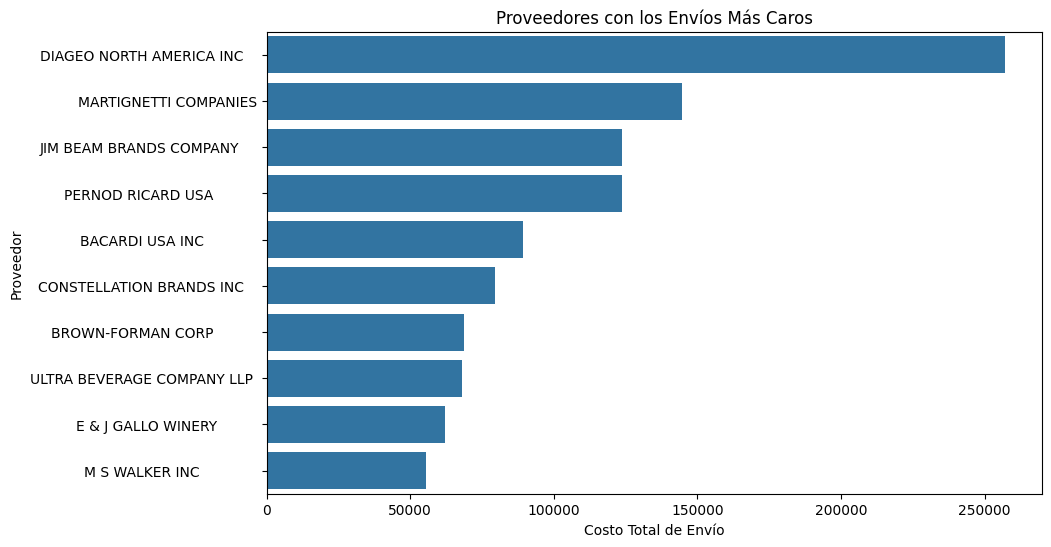

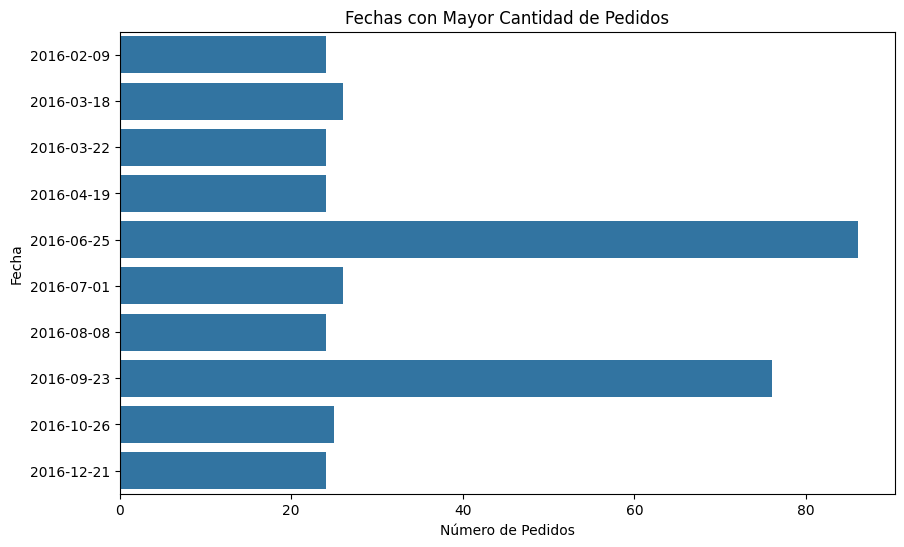

In [19]:
#Grafico de barras con TOP de proveedores frecuentes, productos mas demandados, fecha con mayor cantidad de pedidos y proveedores con envios mas elevados
# Primeros 10 proveedores más frecuentes
top_10_proveedores = Compras['Nombre_vendedor'].value_counts().head(10)
top_10_proveedores_df = Compras[Compras['Nombre_vendedor'].isin(top_10_proveedores.index)]

# Primeros 10 productos más demandados (suponiendo que los productos están identificados por 'PONumber')
top_10_productos = Compras['CompraID'].value_counts().head(10)
top_10_productos_df = Compras[Compras['CompraID'].isin(top_10_productos.index)]

# Fechas con mayor cantidad de pedidos
top_10_fechas = Compras['Fecha_ordencompra'].value_counts().head(10)
top_10_fechas_df = Compras[Compras['Fecha_ordencompra'].isin(top_10_fechas.index)]

# Proveedores con los envíos más caros
top_10_envios = Compras.groupby('Nombre_vendedor')['Costo_envio'].sum().nlargest(10)
top_10_envios_df = Compras[Compras['Nombre_vendedor'].isin(top_10_envios.index)]

# Mostrar resultados como tablas
print("Top 10 Proveedores Más Frecuentes:")
print(top_10_proveedores_df)
print("\nTop 10 Productos Más Demandados:")
print(top_10_productos_df)
print("\nFechas con Mayor Cantidad de Pedidos:")
print(top_10_fechas_df)
print("\nProveedores con los Envíos Más Caros:")
print(top_10_envios_df)


# Gráfico: Top proveedores con los envíos Más Caros
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_envios.values, y=top_10_envios.index)
plt.title('Proveedores con los Envíos Más Caros')
plt.xlabel('Costo Total de Envío')
plt.ylabel('Proveedor')
plt.show()

# Gráfico: Fechas con Mayor Cantidad de Pedidos
top_10_fechas_sorted = top_10_fechas.sort_index()  # Ordenar por fecha
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_fechas_sorted.values, y=top_10_fechas_sorted.index)
plt.title('Fechas con Mayor Cantidad de Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Fecha')
plt.show()

In [20]:
#Guardamos estos procesos en un nuevo CSV
Compras.to_csv('Tabla_Compras.csv', index=False)

#Imprimimos mensaje de confirmacion
print("Archivo guardado exitosamente") 

Archivo guardado exitosamente
